<a href="https://colab.research.google.com/github/tpeterz/happy-flix/blob/main/Alternative_Model_Testing/Additional_Model_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook was created using Google Colab
---
# This notebook calculates the sentiment score of reviews, and tests on a model
## NLTK Vader Library - (Valence Aware Dictionary and Sentiment Reasoner)
#### Vader Metrics:

- **Compound Score** (compound): Normalized, weighted composite score that ranges from -1 (most negative) to +1 (most positive). It represents the overall sentiment of the text.
- **Negative Score** (neg): The proportion of the text that is identified as having a negative sentiment.
- **Neutral Score** (neu): The proportion of the text that is identified as having a neutral sentiment.
- **Positive Score** (pos): The proportion of the text that is identified as having a positive sentiment.
#### Definitions obtained at : https://medium.com/@yrpoddar/python-libraries-for-sentiment-analysis-a-study-on-what-to-choose-52fb26860a77

---
## Movie Reviews Analysis
---

#### 1. Load Libraries

In [ ]:
import pandas as pd
import numpy as np
# Uncomment if the a full display of dataframe is desired:
# pd.set_option('display.max_colwidth', None)

import string
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
# from wordcloud.wordcloud import STOPWORDSl
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
!pip install nrclex


# pip install pandas numpy sklearn transformers tensorflow

#### 1.1. Read in the **clean_movies.csv** file

In [ ]:
movie_df = pd.read_csv('clean_movies.csv')
# Duplicate index was automatically created, drop it from the dataframe
movie_df = movie_df.drop(columns=['Unnamed: 0'])
movie_df.head()

,genre_ids,movie_id,popularity,release_date,title,clean_reviews,type_Action,type_Adventure,type_Animation,type_Comedy,...,type_TV Movie,type_Thriller,type_War,type_Western,clean_overviews,release_year,lemmatized_overviews,adjective_counts,lemmatized_reviews,sentiment
0,"[878, 12]",693134,4534.956,2024-02-27,Dune: Part Two,dune part two surpasses even highest expectati...,0,1,0,0,...,0,0,0,0,follow mythic journey paul atreides unites cha...,2024,"[('follow', 'a'), ('mythic', 'a'), ('journey',...","Counter({'follow': 1, 'mythic': 1, 'chani': 1,...","[('dune', 'a'), ('part', 'n'), ('two', 'n'), (...",1
1,"[16, 28, 12, 35, 10751]",1011985,3214.314,2024-03-02,Kung Fu Panda 4,kung fu panda isnt best kung fu panda film eve...,1,1,1,1,...,0,0,0,0,po gearing become spiritual leader valley peac...,2024,"[('po', 'n'), ('gear', 'v'), ('become', 'a'), ...","Counter({'become': 1, 'spiritual': 1, 'new': 1})","[('kung', 'n'), ('fu', 'n'), ('panda', 'n'), (...",0
2,"[28, 878, 12, 14]",823464,2297.340,2024-03-27,Godzilla x Kong: The New Empire,godzilla x kong new empire version previous in...,1,1,0,0,...,0,0,0,0,following explosive showdown godzilla kong mus...,2024,"[('follow', 'v'), ('explosive', 'a'), ('showdo...","Counter({'explosive': 1, 'showdown': 1, 'undis...","[('godzilla', 'n'), ('x', 'n'), ('kong', 'v'),...",1
3,"[28, 53]",359410,1134.726,2024-03-08,Road House,poor scenario story add ending also convincing...,1,0,0,0,...,0,1,0,0,ex ufc fighter dalton take job bouncer florida...,2024,"[('ex', 'n'), ('ufc', 'a'), ('fighter', 'n'), ...",Counter({'ufc': 1}),"[('poor', 'a'), ('scenario', 'n'), ('story', '...",1
4,"[28, 14]",634492,921.140,2024-02-14,Madame Web,start heavily pregnant woman deep peruvian jun...,1,0,0,0,...,0,0,0,0,forced confront revelation past paramedic cass...,2024,"[('force', 'v'), ('confront', 'a'), ('revelati...","Counter({'confront': 1, 'paramedic': 1, 'young...","[('start', 'v'), ('heavily', 'r'), ('pregnant'...",1


# Sentiment Polairty with VADERS
## Steps to take:
1.  Import the nltk library. Download the `vader_lexicon` package.
2. Create an instance with the `SentimentIntensityAnalyzer()`, we will call it `sia`.
3. Create a function to test the analyser on the first movie - Dune: Part 2
  - The uncleaned and readable version of these reviews indicates a very positive sentiment. The hope is for VADERS to detect just that.
4. We could choose to focus on the `compound` score, that provides the average sentiment of the each review.
5. Apply this to the entire `clean_reviews` column.
6. Add




In [ ]:
# 1.
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# 2.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
# 3.
def sentiment_analyzer(review):
    if not isinstance(review, str):
        # Handle non-string inputs
        review = str(review)
    polarity_score = sia.polarity_scores(review)
    return pd.DataFrame.from_dict(polarity_score, orient='index').transpose()


#### Taking only the **compound** score from the analyzer, to later store in the dataframe

In [ ]:
# 4.
# Apply the sentiment analyzer to each review
movie_df['sentiment_scores'] = movie_df['clean_reviews'].apply(sentiment_analyzer)

# Extract the sentiment scores into separate columns
movie_df['positive'] = movie_df['sentiment_scores'].apply(lambda x: x['pos'])
movie_df['negative'] = movie_df['sentiment_scores'].apply(lambda x: x['neg'])
movie_df['neutral'] = movie_df['sentiment_scores'].apply(lambda x: x['neu'])
movie_df['compound'] = movie_df['sentiment_scores'].apply(lambda x: x['compound'])

# Drop the temporary 'sentiment_scores' column
movie_df.drop('sentiment_scores', axis=1, inplace=True)

In [ ]:
# 6. Add some styling to highlight the added column `compund` that holds the compound polarity scores.
movie_df.head()

,genre_ids,movie_id,popularity,release_date,title,clean_reviews,type_Action,type_Adventure,type_Animation,type_Comedy,...,clean_overviews,release_year,lemmatized_overviews,adjective_counts,lemmatized_reviews,sentiment,positive,negative,neutral,compound
0,"[878, 12]",693134,4534.956,2024-02-27,Dune: Part Two,dune part two surpasses even highest expectati...,0,1,0,0,...,follow mythic journey paul atreides unites cha...,2024,"[('follow', 'a'), ('mythic', 'a'), ('journey',...","Counter({'follow': 1, 'mythic': 1, 'chani': 1,...","[('dune', 'a'), ('part', 'n'), ('two', 'n'), (...",1,0.285,0.070,0.646,0.9995
1,"[16, 28, 12, 35, 10751]",1011985,3214.314,2024-03-02,Kung Fu Panda 4,kung fu panda isnt best kung fu panda film eve...,1,1,1,1,...,po gearing become spiritual leader valley peac...,2024,"[('po', 'n'), ('gear', 'v'), ('become', 'a'), ...","Counter({'become': 1, 'spiritual': 1, 'new': 1})","[('kung', 'n'), ('fu', 'n'), ('panda', 'n'), (...",0,0.177,0.274,0.548,-0.9934
2,"[28, 878, 12, 14]",823464,2297.340,2024-03-27,Godzilla x Kong: The New Empire,godzilla x kong new empire version previous in...,1,1,0,0,...,following explosive showdown godzilla kong mus...,2024,"[('follow', 'v'), ('explosive', 'a'), ('showdo...","Counter({'explosive': 1, 'showdown': 1, 'undis...","[('godzilla', 'n'), ('x', 'n'), ('kong', 'v'),...",1,0.176,0.110,0.714,0.9822
3,"[28, 53]",359410,1134.726,2024-03-08,Road House,poor scenario story add ending also convincing...,1,0,0,0,...,ex ufc fighter dalton take job bouncer florida...,2024,"[('ex', 'n'), ('ufc', 'a'), ('fighter', 'n'), ...",Counter({'ufc': 1}),"[('poor', 'a'), ('scenario', 'n'), ('story', '...",1,0.332,0.110,0.558,0.9616
4,"[28, 14]",634492,921.140,2024-02-14,Madame Web,start heavily pregnant woman deep peruvian jun...,1,0,0,0,...,forced confront revelation past paramedic cass...,2024,"[('force', 'v'), ('confront', 'a'), ('revelati...","Counter({'confront': 1, 'paramedic': 1, 'young...","[('start', 'v'), ('heavily', 'r'), ('pregnant'...",1,0.216,0.103,0.680,0.9948


In [ ]:
pip install --upgrade transformers

In [ ]:
!pip install transformers[torch] datasets accelerate -U

In [ ]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
from transformers import Trainer, TrainingArguments
# Initialize the model for sequence classification
num_labels = 6
id2label = {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
}
label2id = {v: k for k, v in id2label.items()}

model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels, id2label=id2label, label2id=label2id)

# Fine-tune the model
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
)

trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print(eval_results)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
500,0.910400
1000,0.270000
1500,0.160400
2000,0.146600
2500,0.092900
3000,0.083200


{'eval_loss': 0.16787847876548767, 'eval_runtime': 232.595, 'eval_samples_per_second': 8.599, 'eval_steps_per_second': 0.138, 'epoch': 3.0}


In [ ]:
log_history = trainer.state.log_history

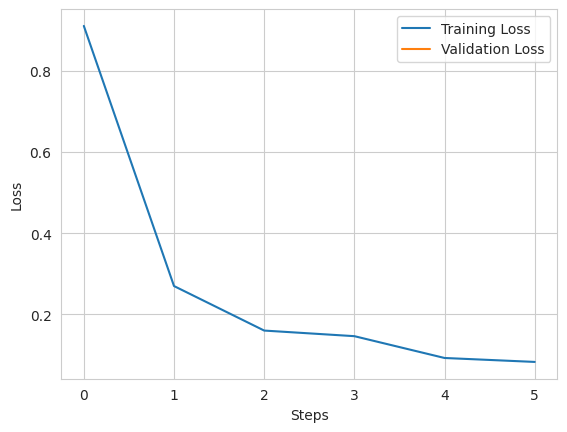

In [ ]:
import matplotlib.pyplot as plt

# Extract training and evaluation loss
train_loss = [log['loss'] for log in log_history if 'loss' in log]
eval_loss = [log['eval_loss'] for log in log_history if 'eval_loss' in log]

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Displayed above we can see, after a very long runtime, that this process sadly did not track validation loss while running.
# This file is still being added to the repository to ofurther show our process of working with these models and evaluation

In [ ]:
eval_results = trainer.evaluate(eval_dataset=emotions_encoded["validation"])
print(eval_results)

{'eval_loss': 0.16787847876548767, 'eval_runtime': 248.0666, 'eval_samples_per_second': 8.062, 'eval_steps_per_second': 0.129, 'epoch': 3.0}
